# 08 – Time Series & Line Plots in Seaborn
**Author:** Hamna Munir  
**Repository:** Python-Libraries-for-AI-ML  
**Topic:** Time Series Visualization using Seaborn

---
Seaborn provides powerful tools for visualizing **time series data**, especially through `lineplot()` and figure-level functions like `relplot()`.

In this notebook, we will learn:
- Plotting time series with Seaborn
- Rolling mean (moving average)
- Multiple time series in one plot
- Styling and formatting time series plots
- Adding confidence intervals (CI)


# 1. Importing Libraries & Loading Data

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme(style="whitegrid")

# Load dataset
flights = sns.load_dataset("flights")

# Convert month name → month number (using abbreviated month format)
flights['month_num'] = pd.to_datetime(flights['month'], format="%b").dt.month

# Create proper date column
flights['date'] = pd.to_datetime(
    flights['year'].astype(str) + '-' + flights['month_num'].astype(str),
    format="%Y-%m"
)

flights.head()


,year,month,passengers,month_num,date
0,1949,Jan,112,1,1949-01-01
1,1949,Feb,118,2,1949-02-01
2,1949,Mar,132,3,1949-03-01
3,1949,Apr,129,4,1949-04-01
4,1949,May,121,5,1949-05-01


# 2. Basic Time Series Plot
Use `sns.lineplot()` to visualize passengers over time.

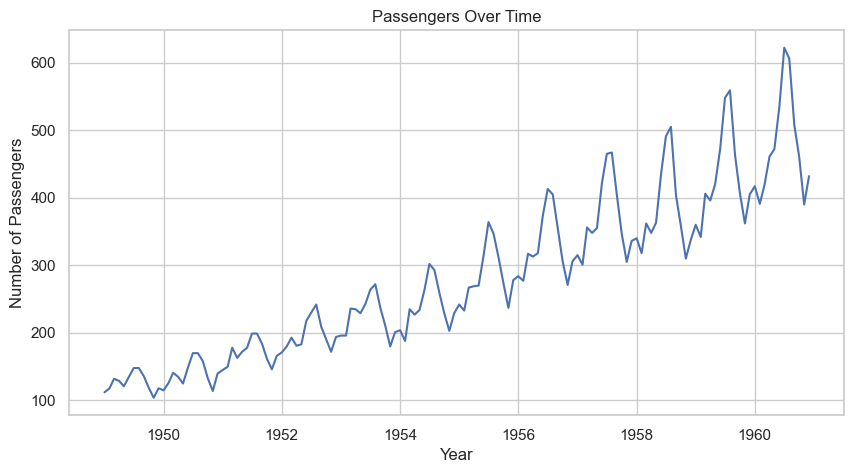

In [5]:
plt.figure(figsize=(10,5))
sns.lineplot(data=flights, x="date", y="passengers")
plt.title("Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.show()

# 3. Rolling Mean (Moving Average)
A rolling mean smooths out fluctuations in the data.

We will compute a **12-month moving average**.

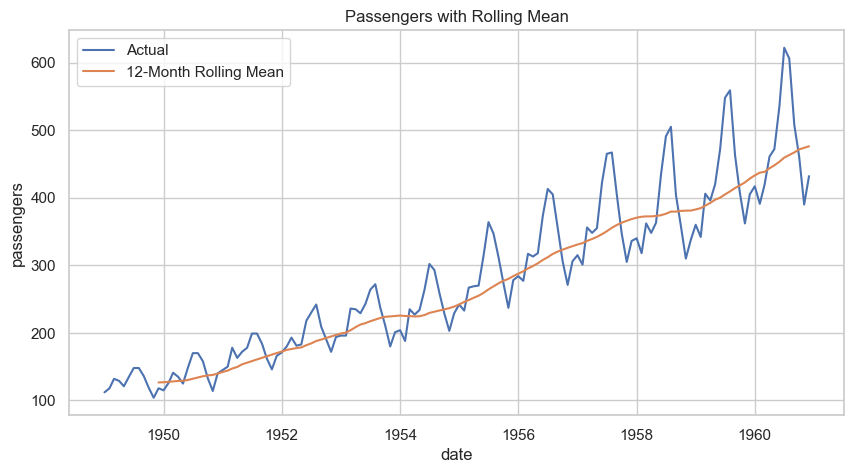

In [6]:
flights['rolling_mean'] = flights['passengers'].rolling(window=12).mean()

plt.figure(figsize=(10,5))
sns.lineplot(data=flights, x="date", y="passengers", label="Actual")
sns.lineplot(data=flights, x="date", y="rolling_mean", label="12-Month Rolling Mean")
plt.title("Passengers with Rolling Mean")
plt.show()

# 4. Multiple Time Series in One Plot
We compare **different months** or **multiple categories**.

Example: Group by month and plot each month separately.

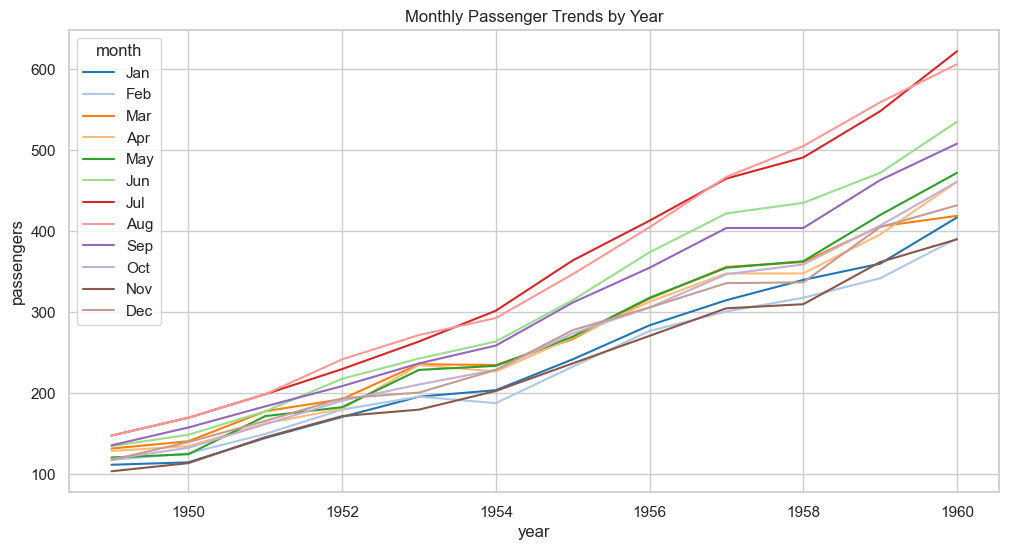

In [7]:
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x="year", y="passengers", hue="month", palette="tab20")
plt.title("Monthly Passenger Trends by Year")
plt.show()

# 5. Styling Time Series Plots
Seaborn allows custom colors, line styles, markers, and themes.

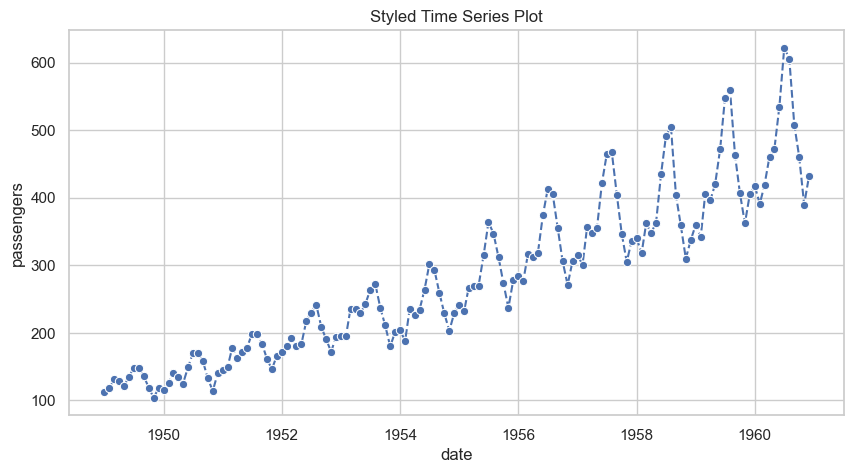

In [8]:
plt.figure(figsize=(10,5))
sns.lineplot(data=flights, x="date", y="passengers", linestyle="--", marker="o")
plt.title("Styled Time Series Plot")
plt.show()

# 6. Adding Confidence Intervals (CI)
Seaborn adds CI automatically for repeated observations.

We simulate repeated samples to show CI behavior.

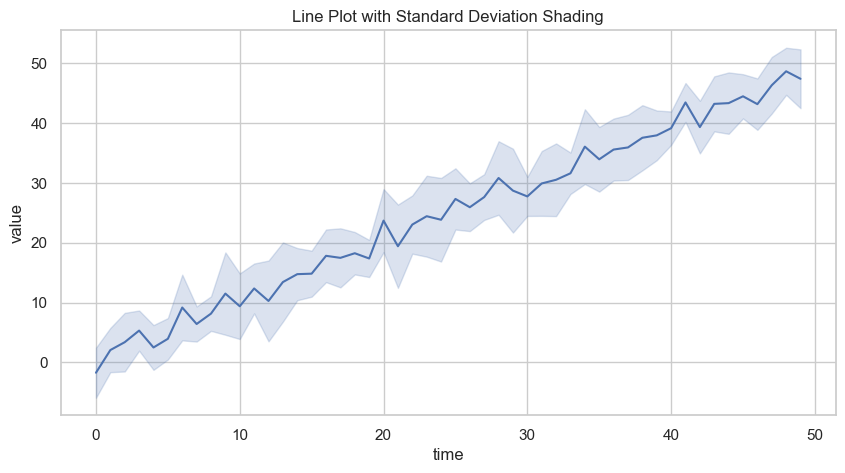

In [12]:
np.random.seed(42)

df = pd.DataFrame({
    "time": np.tile(np.arange(0, 50), 10),
    "value": np.random.normal(
        loc=np.tile(np.arange(0, 50), 10),
        scale=5,
        size=500
    )
})

plt.figure(figsize=(10,5))
sns.lineplot(data=df, x="time", y="value", errorbar="sd")
plt.title("Line Plot with Standard Deviation Shading")
plt.show()


# Summary
- `lineplot()` is the main function for time series.
- Rolling mean smooths out noise.
- Multiple time series can be plotted using the `hue` parameter.
- Styling options include dashed lines, markers, color palettes.
- Confidence intervals (CI) help visualize variation.
